# Global Terrorism Data Processing and Visualization

## Project prepared for 'Data exploration' classes by *Katarzyna Czosnyka*

### Informatics and electronics in medicine, semester 3

### **Reading data from *.csv**

In [225]:
import csv
import numpy as np
import pandas as pd

data = pd.read_csv("C:\\Users\\Katarzyna\\Desktop\\globalterrorismdb.csv", encoding = 'ISO-8859-1', low_memory = False)


### Check the DataFrame and the information you can get

In [226]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


## Answer the questions

### **When the most common attacks occured? Give 5 years with the most common assassination attempts.**

In [53]:
data['iyear'].value_counts().head(5)

1971    471
1973    473
1972    568
1974    581
1970    651
Name: iyear, dtype: int64

### **When did the number of assassination attempts start growing? Visualize the number of assassinations for each year from 1970 till 2017 on the line plot.**

In [27]:
import matplotlib.pyplot as plt

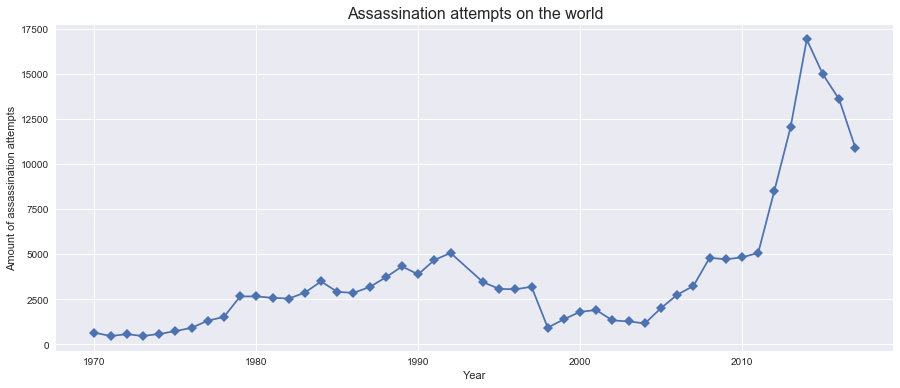

In [188]:
plt.figure(figsize=(15,6))
plt.plot(data['iyear'].value_counts().sort_index(), marker="D")
plt.title('Assassination attempts on the world', size = 16)
plt.xlabel('Year')
plt.ylabel('Amount of assassination attempts')
plt.show()

### **What was the most safest years with the lowest amount of assassination attempts?**

In [54]:
data['iyear'].value_counts().sort_values().head(5)

1971    471
1973    473
1972    568
1974    581
1970    651
Name: iyear, dtype: int64

### **Create bar plot visualizing number of assassination attempts for each country**

C:\Users\Katarzyna\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


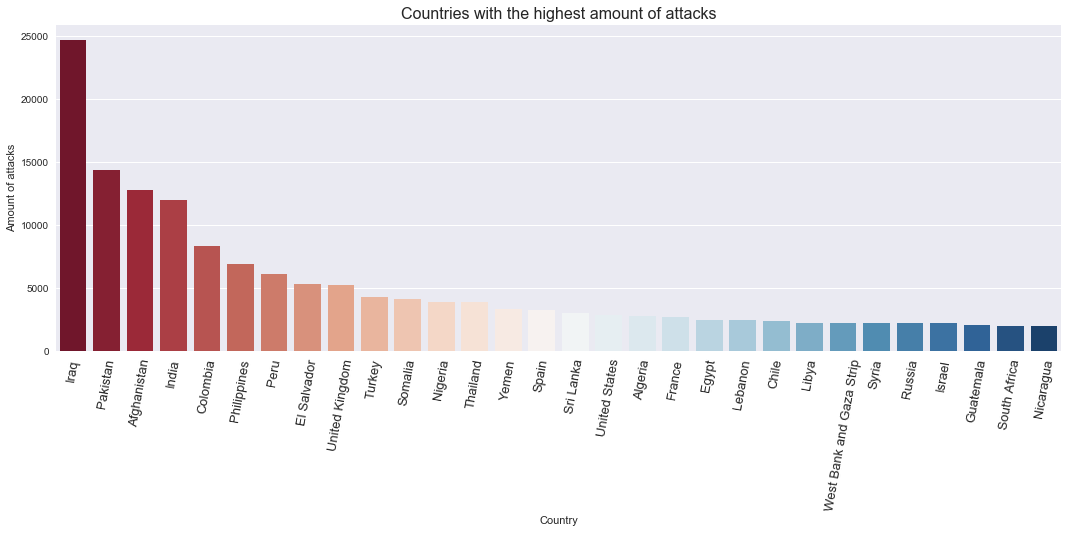

In [195]:
plt.subplots(figsize=(18,6))
sns.countplot('country_txt',data=data,palette='RdBu',order=data['country_txt'].value_counts()[:30].index)
plt.xticks(rotation=80, size = 13)
plt.xlabel('Country')
plt.ylabel('Amount of attacks')
plt.title('Countries with the highest amount of attacks', size = 16)
plt.show()

### **Is there a correlation between number of terrorists and success of the assassinacion?**

In [143]:
data[['nperps', 'success']].corr() 

,nperps,success
nperps,1.000000,0.011557
success,0.011557,1.000000


### **What types of attacks have occurred most frequently? Make visualization.**

In [119]:
import seaborn as sns

C:\Users\Katarzyna\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


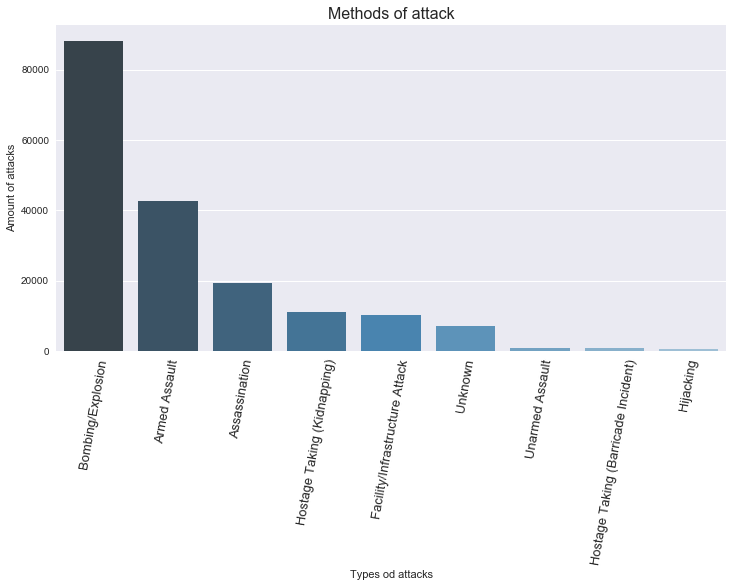

In [194]:
plt.subplots(figsize=(12,6))
sns.countplot('attacktype1_txt',data=data, palette='Blues_d',order=data['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=80, size = 13)
plt.ylabel('Amount of attacks')
plt.xlabel('Types od attacks')
plt.title('Methods of attack', size = 16)
plt.show()

### **How many attacks were in Poland and how many people died each year?**

In [165]:
data[data['country_txt'] == 'Poland']['eventid'].count()

39

In [175]:
attacks_poland = data[data['country_txt'] == 'Poland']

In [220]:
kills_year = attacks_poland[['iyear', 'nkill']].groupby(['iyear']).sum()

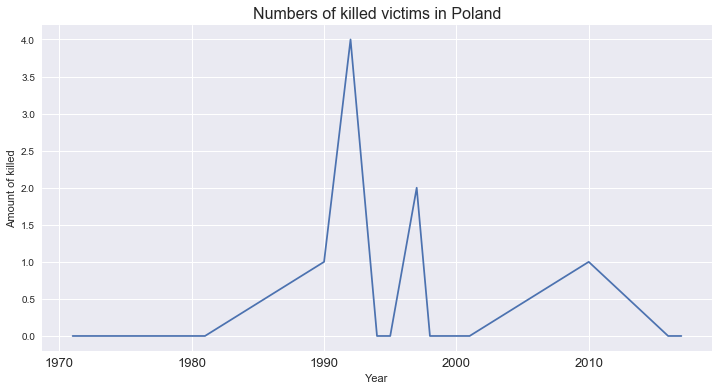

In [224]:
plt.subplots(figsize=(12,6))
plt.plot(kills_year)

plt.xticks(size = 13)
plt.ylabel('Amount of killed')
plt.xlabel('Year')
plt.title('Numbers of killed victims in Poland', size = 16)
plt.show()